In [49]:
import librosa
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
wav_files = 'voice_file/'

In [3]:
# ravdess data
ravdess_directory_list = os.listdir(wav_files)

file_emotion = []
file_path = []
temp = []

for dir in ravdess_directory_list:
    actor_files = os.listdir(os.path.join(wav_files, dir))
    for file in actor_files:
        part = file.split('.')[0]
        part = part.split('-')
        temp.append(part)
        file_path.append(wav_files + dir + '/' + file)
    for i in temp:
        if len(i) >= 3:  
            file_emotion.append(int(i[2]))  
        else:
            file_emotion.append(None)
            


path_df = pd.DataFrame(file_path, columns=['path'])
emotion_df = pd.DataFrame(file_emotion, columns=['emotions'])
emotion_df.dropna(inplace=True)

ravdess_df = pd.concat([emotion_df, path_df], axis=1)


ravdess_df.emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
ravdess_df['emotion_num'] = file_emotion


ravdess_df.dropna(inplace=True)
ravdess_df['emotions'].value_counts()

neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: emotions, dtype: int64

In [4]:
# crema data
crema_directory_list = os.listdir('Crema')

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append('Crema/' + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['path'])
crema_df = pd.concat([emotion_df, path_df], axis=1)

crema_df['emotion_num'] = file_emotion
crema_df['emotion_num'].replace({'neutral':1, 'calm':2, 'happy':3, 'sad':4, 'angry':5 , 'fear':6, 'disgust':7, 'surprise':8}, inplace=True)

# print(Crema_df.emotions.value_counts())
crema_df['emotions'].value_counts()

disgust    1270
fear       1270
happy      1270
sad        1270
angry      1269
neutral    1086
Name: emotions, dtype: int64

In [5]:
df = pd.concat([ravdess_df, crema_df], axis=0)

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df

,emotions,path,emotion_num
0,neutral,voice_file/Actor_01/03-01-01-01-01-01-01.wav,1
1,neutral,voice_file/Actor_01/03-01-01-01-01-02-01.wav,1
2,neutral,voice_file/Actor_01/03-01-01-01-02-01-01.wav,1
3,neutral,voice_file/Actor_01/03-01-01-01-02-02-01.wav,1
4,neutral,voice_file/Actor_01/03-01-02-01-01-01-01.wav,2
...,...,...,...
8870,disgust,Crema/1091_WSI_DIS_XX.wav,7
8871,fear,Crema/1091_WSI_FEA_XX.wav,6
8872,happy,Crema/1091_WSI_HAP_XX.wav,3
8873,neutral,Crema/1091_WSI_NEU_XX.wav,1


In [8]:
# audio, sr = librosa.load(df['path'][0], res_type='kaiser_fast')
# mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
# mfccs_mean = np.mean(mfccs.T,axis=0)

# np.where(audio != 0)
# mfccs.shape

In [9]:
# max_len = 0

# for audio in df['path']:
#     a, sr = librosa.load(audio, res_type='kaiser_fast')
#     max_len = max(a.shape[0], max_len) 
    


In [10]:
# max_len

In [11]:
# Feature Extraction 

def extract_features(file_path):
    try:
        # Load the audio file
        audio, sr = librosa.load(file_path, res_type='kaiser_fast')
        
        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        mfccs = mfccs.ravel().T
        # mfccs_mean = np.mean(mfccs.T,axis=0)
        
        # Extract Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        spectral_centroid = np.squeeze(spectral_centroid)
        # spectral_centroid_mean = np.mean(spectral_centroid)
        
        # Combine MFCCs and Spectral Centroid into a single feature array
        
        # features = np.concatenate([mfccs, spectral_centroid])
        
        return mfccs, spectral_centroid
    except Exception as e:
        print("Error encountered while parsing file:", file_path)
        return None


In [12]:
# Apply feature extraction function to each row in the DataFrame
# df['features'] = df['path'].apply(extract_features)
mfcc_ft = []
spectral_ft = []

for audio_path in df['path']:
    mfccs, spectral_c = extract_features(audio_path)
    mfcc_ft.append(mfccs)
    spectral_ft.append(spectral_c)


# Drop rows with errors
# df = df.dropna()

# Convert features to numpy array
# X = np.array(df['features'].tolist())

# Convert emotions to numerical labels
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(df['emotions'])

# Check the shape of X and y
# print("Shape of X:", X.shape)
# print("Shape of y:", y.shape)


In [13]:
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """
    h = array.shape[0]
    w = array.shape[1]
    a = max((xx - h) // 2,0)
    aa = max(0,xx - a - h)
    b = max(0,(yy - w) // 2)
    bb = max(yy - b - w,0)
    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

In [14]:

def pad_arrays(arrays, max_len):
    for array in arrays:
        padded_array = np.pad(array, (0, max_len - len(array)), mode='constant')
        yield padded_array

# maximum length
max_len = 116247

# Pad mfcc_ft list
mfcc_ft_padded = []
for padded_array in pad_arrays(mfcc_ft, max_len):
    mfcc_ft_padded.append(padded_array)


In [16]:
# Pad spectral_ft list
spectral_ft_padded = []
for padded_array in pad_arrays(spectral_ft, max_len):
    spectral_ft_padded.append(padded_array)


In [30]:
# WAY TOO HEAVY TO CONCAT 15Gib

# df_padded = np.concatenate([mfcc_ft_padded, spectral_ft_padded], axis=1)

In [28]:
# padding & concat 
# len(df_padded)

17750

In [27]:
len(mfcc_ft_padded)

8875

In [35]:
X = np.array(mfcc_ft_padded)

X

array([[-857.3074 , -857.3074 , -857.3074 , ...,    0.     ,    0.     ,
           0.     ],
       [-864.88824, -864.88824, -864.88824, ...,    0.     ,    0.     ,
           0.     ],
       [-849.7949 , -847.55316, -844.9773 , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [-568.812  , -541.89966, -538.7886 , ...,    0.     ,    0.     ,
           0.     ],
       [-567.7332 , -543.2253 , -540.13324, ...,    0.     ,    0.     ,
           0.     ],
       [-590.3429 , -553.7593 , -549.04663, ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

In [59]:
y = df['emotion_num']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7100, 116247) (7100,) (1775, 116247) (1775,)


In [54]:
X_train.dtype

dtype('float32')

In [55]:
# minmax_scaler = MinMaxScaler()
# std_scaler = StandardScaler()

# minmax_scaler.fit_transform(X_train)
# std_scaler.fit_transform(X_train)

In [36]:
# # Scalling 

# # MinMax Scalling
# X_min = np.min(X, axis=0)
# X_max = np.max(X, axis=0)

# X_scaled = (X - X_min) / (X_max - X_min)

# # Standard Scalling 
# X = X.astype(np.float32)
# X_mean = np.mean(X, axis=0)
# X_std = np.std(X, axis=0)
# X = (X - X_mean)/X_std

# X_scaled

C:\Users\Nimrod\AppData\Local\Temp\ipykernel_3824\1366708735.py:7: RuntimeWarning: invalid value encountered in divide
  X_scaled = (X - X_min) / (X_max - X_min)
C:\Users\Nimrod\AppData\Local\Temp\ipykernel_3824\1366708735.py:13: RuntimeWarning: invalid value encountered in divide
  X = (X - X_mean)/X_std


array([[0.29083088, 0.27722427, 0.26564667, ...,        nan,        nan,
               nan],
       [0.2827862 , 0.269556  , 0.2582986 , ...,        nan,        nan,
               nan],
       [0.29880294, 0.287091  , 0.27759808, ...,        nan,        nan,
               nan],
       ...,
       [0.5969766 , 0.5962696 , 0.5743834 , ...,        nan,        nan,
               nan],
       [0.5981214 , 0.59492874, 0.57308   , ...,        nan,        nan,
               nan],
       [0.57412845, 0.5842732 , 0.56444037, ...,        nan,        nan,
               nan]], dtype=float32)

In [62]:
df['emotion_num'].value_counts()

3    1462
4    1462
6    1462
7    1462
5    1461
1    1182
2     192
8     192
Name: emotion_num, dtype: int64

In [63]:
import tensorflow as tf
from tensorflow.keras import layers as L

def get_regularized_model(reg_coef):
    model = tf.keras.Sequential([
        L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1),
                 kernel_regularizer=tf.keras.regularizers.l2(reg_coef)),
        L.BatchNormalization(),
        L.MaxPool1D(pool_size=5, strides=2, padding='same'),

        L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(reg_coef)),
        L.BatchNormalization(),
        L.MaxPool1D(pool_size=5, strides=2, padding='same'),
        L.Dropout(0.2),  # Import Dropout from keras.layers and use it here

        L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(reg_coef)),
        L.BatchNormalization(),
        L.MaxPool1D(pool_size=5, strides=2, padding='same'),

        L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(reg_coef)),
        L.BatchNormalization(),
        L.MaxPool1D(pool_size=5, strides=2, padding='same'),
        L.Dropout(0.2),

        L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(reg_coef)),
        L.BatchNormalization(),
        L.MaxPool1D(pool_size=3, strides=2, padding='same'),
        L.Dropout(0.2),

        L.Flatten(),
        L.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_coef)),
        L.BatchNormalization(),
        L.Dense(7, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Example usage with regularization coefficient 0.01
reg_coef = 0.0001
model = get_regularized_model(reg_coef)
model.summary()


ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[465024,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:Mul] name: 

In [64]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

MemoryError: Unable to allocate 3.07 GiB for an array with shape (7100, 116247) and data type float32

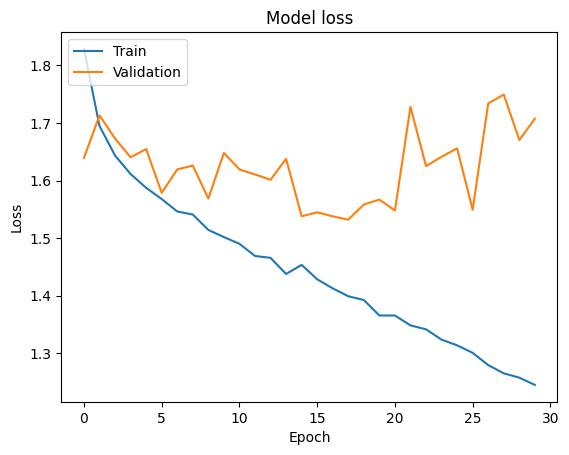

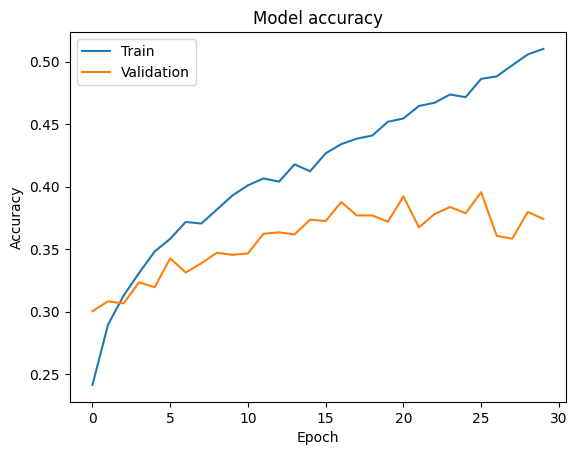

In [54]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [90]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import keras_tuner
import keras

# Define the CNN model
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Reshape((41, 1), input_shape=(41,)))  # Reshape input to match new dimensionality
    model.add(layers.Conv1D(hp.Int('conv1_filters', min_value=32, max_value=128, step=16),
                             3,
                             activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(hp.Int('conv2_filters', min_value=32, max_value=128, step=16),
                             3,
                             activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(hp.Int('conv3_filters', min_value=32, max_value=128, step=16),
                             3,
                             activation='relu'))
    model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8, activation='softmax'))  # Assuming 8 emotions
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the RandomSearch tuner
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,  # Adjust as needed
                     directory='my_dir',
                     project_name='my_project')

# Perform hyperparameter search
tuner.search(X_train, y_train,
             epochs=5,  # Adjust as needed
             validation_data=(X_val, y_val))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Reloading Tuner from my_dir\my_project\tuner0.json
Epoch 1/50
222/222 [==============================] - 3s 10ms/step - loss: 1.7924 - accuracy: 0.2577 - val_loss: 1.6447 - val_accuracy: 0.3127
Epoch 2/50
222/222 [==============================] - 2s 9ms/step - loss: 1.6431 - accuracy: 0.3124 - val_loss: 1.5939 - val_accuracy: 0.3239
Epoch 3/50
222/222 [==============================] - 2s 10ms/step - loss: 1.5992 - accuracy: 0.3307 - val_loss: 1.5552 - val_accuracy: 0.3617
Epoch 4/50
222/222 [==============================] - 2s 10ms/step - loss: 1.5634 - accuracy: 0.3520 - val_loss: 1.5171 - val_accuracy: 0.3882
Epoch 5/50
222/222 [==============================] - 3s 12ms/step - loss: 1.5449 - accuracy: 0.3613 - val_loss: 1.4968 - val_accuracy: 0.3854
Epoch 6/50
222/222 [==============================] - 2s 11ms/step - loss: 1.5196 - accuracy: 0.3797 - val_loss: 1.4764 - val_accuracy: 0.4023
Epoch 7/50
222/222 [==============================] - 2s 10ms/step - loss: 1.5047 - accuracy

56/56 [==============================] - 1s 6ms/step


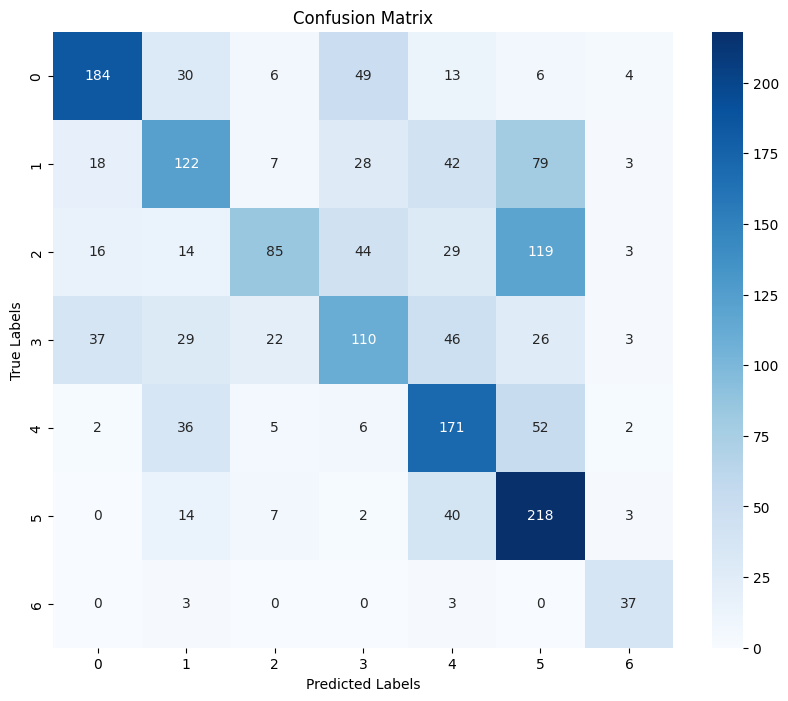

In [78]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Get the predicted probabilities for each class
y_val_pred_probs = model.predict(X_val)

# Convert the predicted probabilities to class labels
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
